# Introduction
website phishing dataset problem.
Fitting Naive Bayes and creating confusion matrix of predicted values and real values I was able to get  78.81% accuracy.


# STEP #0: Import Libraries

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# STEP #1: IMPORT DATASET

In [7]:
train=pd.read_csv('../input/Website Phishing.csv')
train.head(10)

,SFH,popUpWidnow,SSLfinal_State,Request_URL,URL_of_Anchor,web_traffic,URL_Length,age_of_domain,having_IP_Address,Result
0,1,-1,1,-1,-1,1,1,1,0,0
1,-1,-1,-1,-1,-1,0,1,1,1,1
2,1,-1,0,0,-1,0,-1,1,0,1
3,1,0,1,-1,-1,0,1,1,0,0
4,-1,-1,1,-1,0,0,-1,1,0,1
5,-1,-1,1,-1,-1,1,0,-1,0,1
6,1,-1,0,1,-1,0,0,1,0,-1
7,1,0,1,1,0,0,0,1,1,-1
8,-1,-1,0,-1,-1,-1,-1,1,0,0
9,-1,0,-1,-1,1,1,0,-1,0,1


In [8]:
a=len(train[train.Result==0])
b=len(train[train.Result==-1])
c=len(train[train.Result==1])
print(a,"times 0 repeated in Result")
print(b,"times -1 repeated in Result")
print(c,"times 1 repeated in Result")



103 times 0 repeated in Result
702 times -1 repeated in Result
548 times 1 repeated in Result


# STEP #2: Explore /Visualze Data set

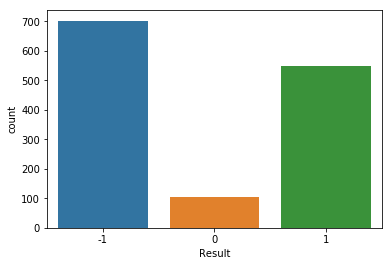

In [9]:
sns.countplot(train['Result'])

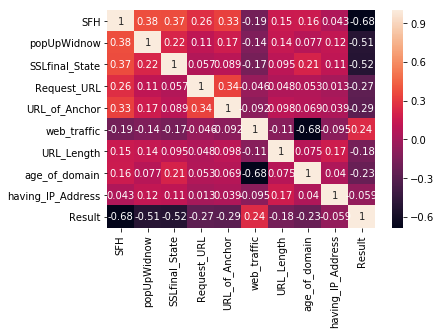

In [10]:
sns.heatmap(train.corr(),annot=True)

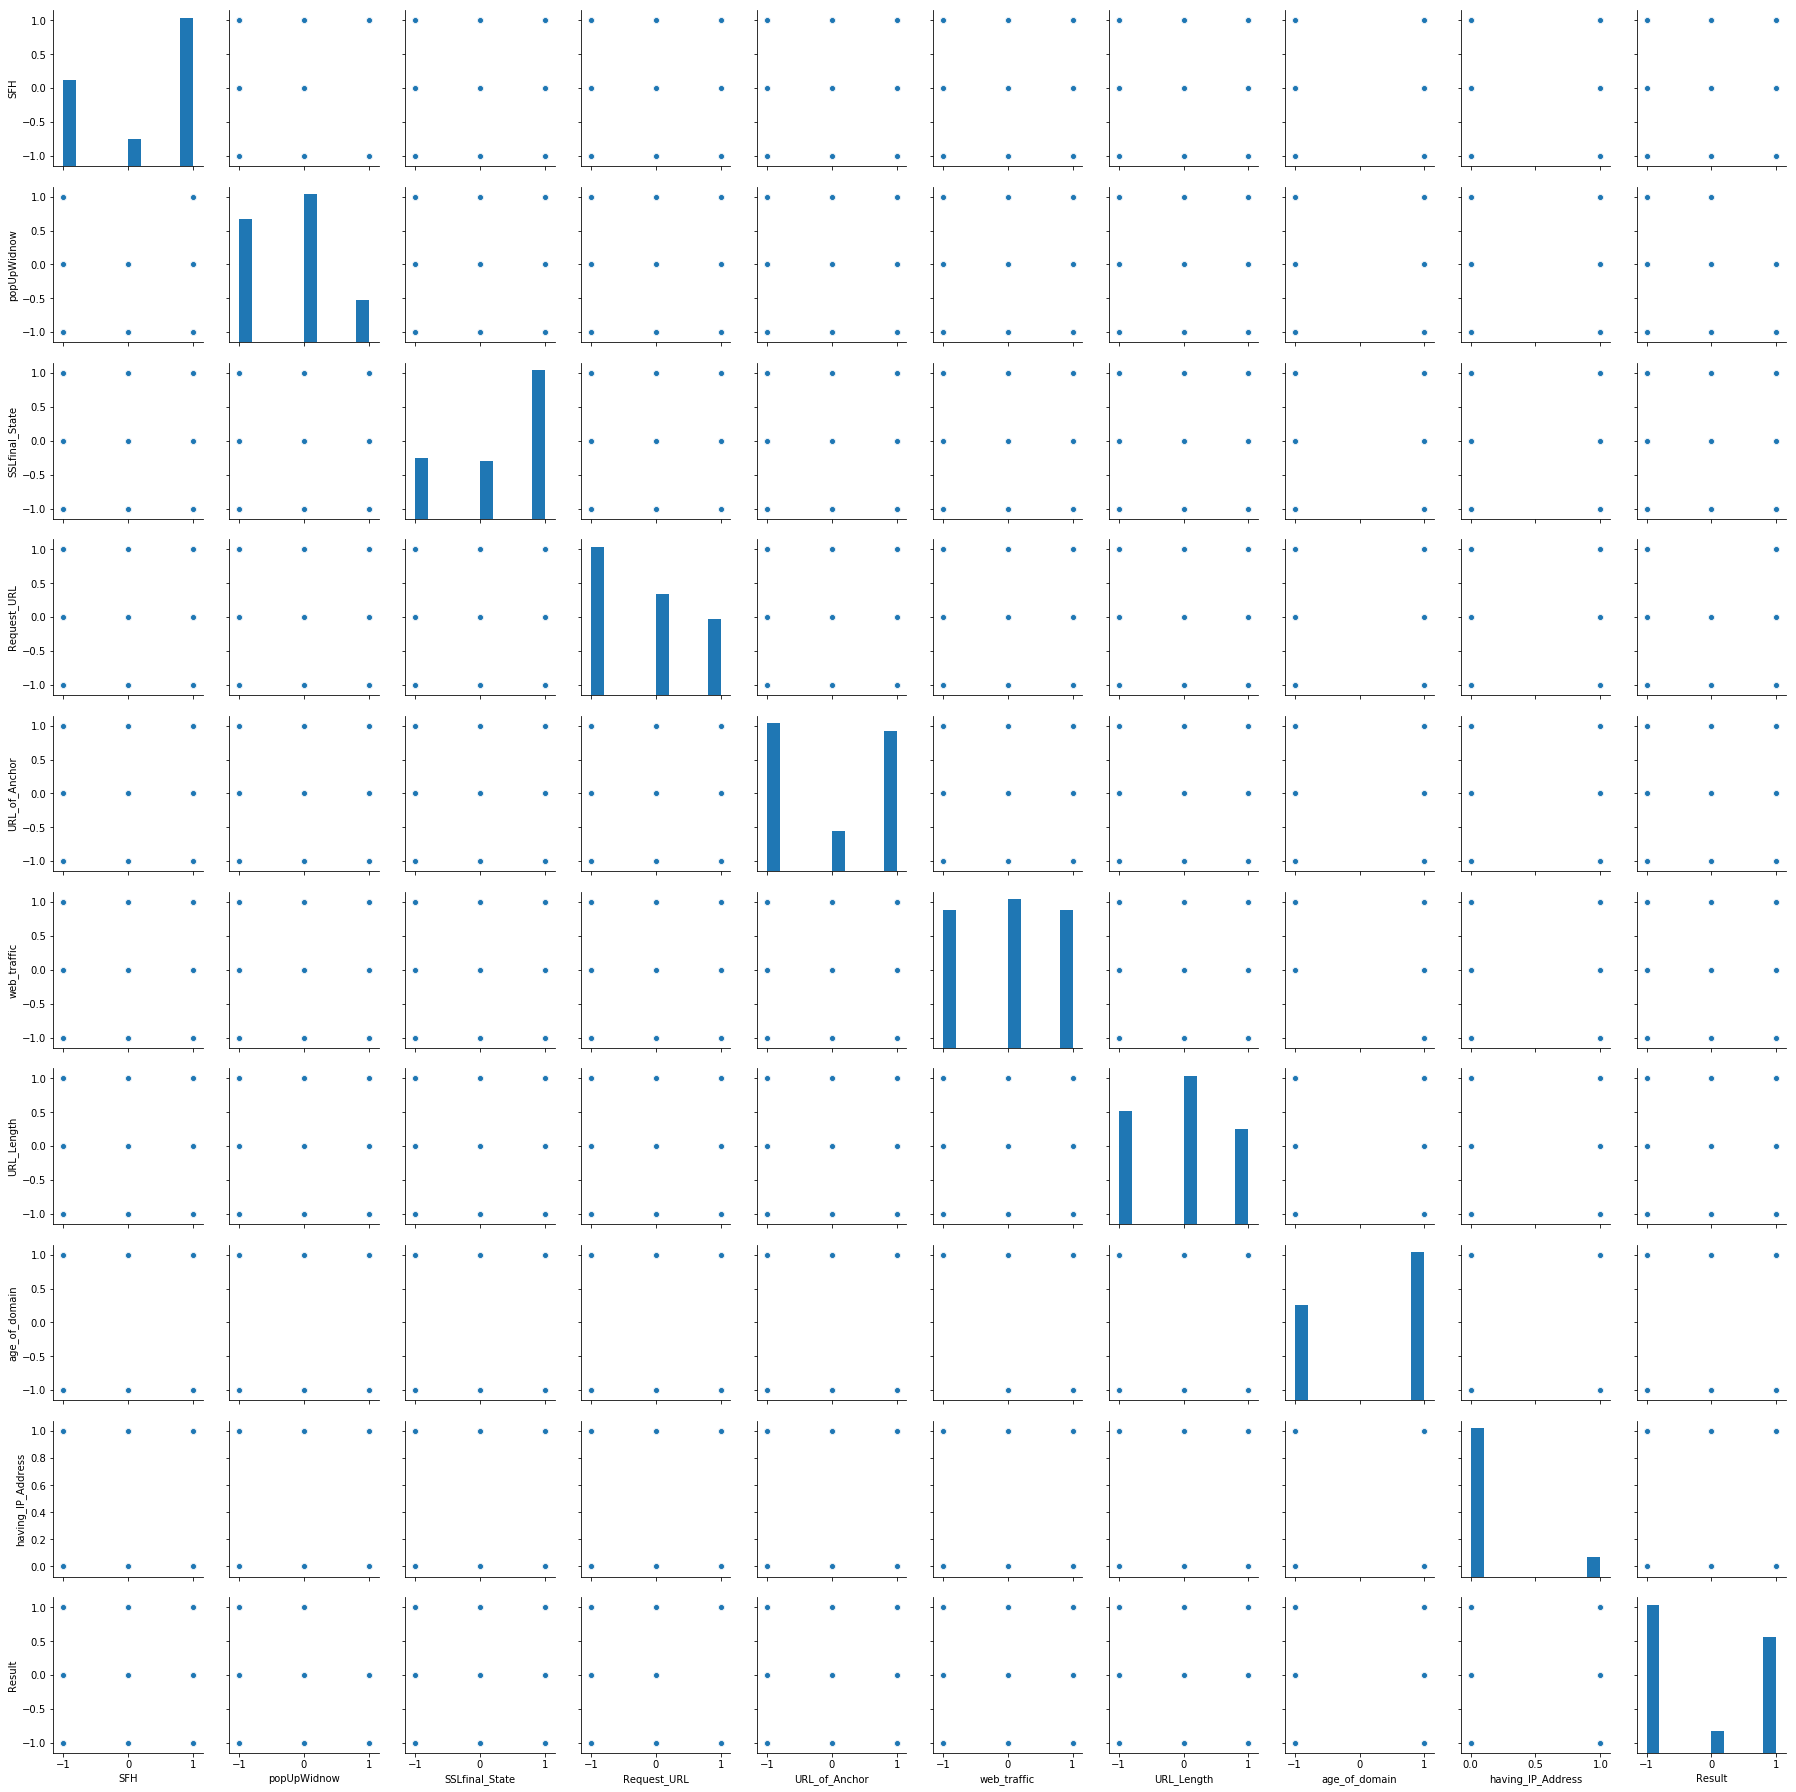

In [11]:
sns.pairplot(train)


In [12]:
train.info()
train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1353 entries, 0 to 1352
Data columns (total 10 columns):
SFH                  1353 non-null int64
popUpWidnow          1353 non-null int64
SSLfinal_State       1353 non-null int64
Request_URL          1353 non-null int64
URL_of_Anchor        1353 non-null int64
web_traffic          1353 non-null int64
URL_Length           1353 non-null int64
age_of_domain        1353 non-null int64
having_IP_Address    1353 non-null int64
Result               1353 non-null int64
dtypes: int64(10)
memory usage: 105.8 KB


,SFH,popUpWidnow,SSLfinal_State,Request_URL,URL_of_Anchor,web_traffic,URL_Length,age_of_domain,having_IP_Address,Result
count,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000
mean,0.237990,-0.258684,0.327421,-0.223208,-0.025129,0.000000,-0.053215,0.219512,0.114560,-0.113821
std,0.916389,0.679072,0.822193,0.799682,0.936262,0.806776,0.762552,0.975970,0.318608,0.954773
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000
25%,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-1.000000
75%,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
X=train.drop('Result',axis=1).values 
y=train['Result'].values

In [14]:
print(X)

[[ 1 -1  1 ...  1  1  0]
 [-1 -1 -1 ...  1  1  1]
 [ 1 -1  0 ... -1  1  0]
 ...
 [-1  0 -1 ... -1 -1  0]
 [ 0  0  1 ... -1  1  0]
 [ 1  0  1 ... -1 -1  0]]


In [15]:
# transform the labels to 0's , 1's and -1's
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
y = enc.fit_transform(y)

for i in range(0, len(X)):
    X[i] = enc.fit_transform(X[i])


In [16]:
X

array([[2, 0, 2, ..., 2, 2, 1],
       [0, 0, 0, ..., 2, 2, 2],
       [2, 0, 1, ..., 0, 2, 1],
       ...,
       [0, 1, 0, ..., 0, 0, 1],
       [1, 1, 2, ..., 0, 2, 1],
       [2, 1, 2, ..., 0, 0, 1]])

# STEP #3: Prepare the Data for Training / Data Cleaning

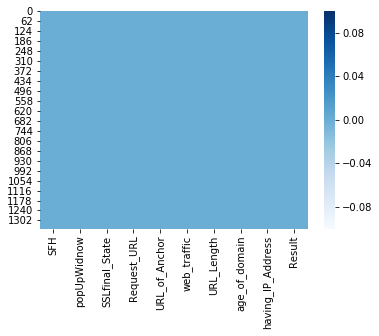

In [17]:
sns.heatmap(train.isnull(),cmap='Blues')


# STEP #4: Model Training

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=10)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))


Training set has 947 samples.
Testing set has 406 samples.


In [19]:
from sklearn.naive_bayes import MultinomialNB

#create Naive Bayes object
model=MultinomialNB(alpha=1.0)

#Train the model using training data 
model.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

# STEP #5: Model Testing

In [20]:
#import Evaluation metrics 
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
 
#Test the model using testing data
predictions = model.predict(X_test)


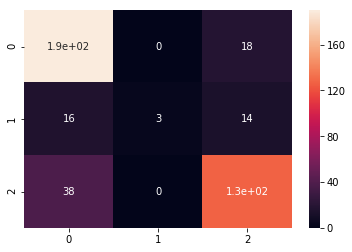

In [21]:
from sklearn.metrics import confusion_matrix,classification_report
cm=confusion_matrix(y_test,predictions)
sns.heatmap(cm,annot=True)

In [22]:
print("f1 score is ",f1_score(y_test,predictions,average='weighted'))
print("matthews correlation coefficient is ",matthews_corrcoef(y_test,predictions))

#secondary metric,we should not consider accuracy score because the classes are imbalanced.

print('****************************************************************************************')
print("The accuracy of your Naive bayes on testing data is: ",100.0 *accuracy_score(y_test,predictions))
print('****************************************************************************************')

f1 score is  0.7628549470172905
matthews correlation coefficient is  0.611643419941352
****************************************************************************************
The accuracy of your Naive bayes on testing data is:  78.81773399014779
****************************************************************************************
